## Imports

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

from skimage.io import imread

## Retrieving the dataset from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osama1orabi","key":"3eec301fd02f1e0626905c382ec77fd1"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d weisinx7/stamps-dataset

 77% 17.0M/22.1M [00:00<00:00, 67.9MB/s]
100% 22.1M/22.1M [00:00<00:00, 81.9MB/s]


In [ ]:
!mkdir stamps-dataset
!unzip stamps-dataset.zip -d stamps-dataset

mkdir: cannot create directory ‘stamps-dataset’: File exists
Archive:  stamps-dataset.zip
  inflating: stamps-dataset/101a_0.bmp  
  inflating: stamps-dataset/101b_5.bmp  
  inflating: stamps-dataset/101c_10.bmp  
  inflating: stamps-dataset/101d_15.bmp  
  inflating: stamps-dataset/101e_20.bmp  
  inflating: stamps-dataset/101f_25.bmp  
  inflating: stamps-dataset/101g_30.bmp  
  inflating: stamps-dataset/101h_35.bmp  
  inflating: stamps-dataset/101i_40.bmp  
  inflating: stamps-dataset/103a_0.bmp  
  inflating: stamps-dataset/103b_5.bmp  
  inflating: stamps-dataset/103c_10.bmp  
  inflating: stamps-dataset/103d_15.bmp  
  inflating: stamps-dataset/103e_20.bmp  
  inflating: stamps-dataset/103f_25.bmp  
  inflating: stamps-dataset/103g_30.bmp  
  inflating: stamps-dataset/103h_35.bmp  
  inflating: stamps-dataset/103i_40.bmp  
  inflating: stamps-dataset/104a_0.bmp  
  inflating: stamps-dataset/104b_5.bmp  
  inflating: stamps-dataset/104c_10.bmp  
  inflating: stamps-dataset/104d_1

## Cleaning the dataset

In [ ]:
import glob

In [ ]:
!ls /content/stamps-dataset/

101a_0.bmp   123i_40.bmp  149h_35.bmp  29g_30.bmp  54f_25.bmp  78e_20.bmp
101b_5.bmp   124a_0.bmp   149i_40.bmp  29h_35.bmp  54g_30.bmp  78f_25.bmp
101c_10.bmp  124b_5.bmp   14a_0.bmp    29i_40.bmp  54h_35.bmp  78g_30.bmp
101d_15.bmp  124c_10.bmp  14b_5.bmp    2a_0.bmp    54i_40.bmp  78h_35.bmp
101e_20.bmp  124d_15.bmp  14c_10.bmp   2b_5.bmp    58a_0.bmp   78i_40.bmp
101f_25.bmp  124e_20.bmp  14d_15.bmp   2c_10.bmp   58b_5.bmp   79a_0.bmp
101g_30.bmp  124f_25.bmp  14e_20.bmp   2d_15.bmp   58c_10.bmp  79b_5.bmp
101h_35.bmp  124g_30.bmp  14f_25.bmp   2e_20.bmp   58d_15.bmp  79c_10.bmp
101i_40.bmp  124h_35.bmp  14g_30.bmp   2f_25.bmp   58e_20.bmp  79d_15.bmp
103a_0.bmp   124i_40.bmp  14h_35.bmp   2g_30.bmp   58f_25.bmp  79e_20.bmp
103b_5.bmp   125a_0.bmp   14i_40.bmp   2h_35.bmp   58g_30.bmp  79f_25.bmp
103c_10.bmp  125b_5.bmp   153a_0.bmp   2i_40.bmp   58h_35.bmp  79g_30.bmp
103d_15.bmp  125c_10.bmp  153b_5.bmp   30a_0.bmp   58i_40.bmp  79h_35.bmp
103e_20.bmp  125d_15.bmp  153c_10.bmp  3

In [ ]:
SCANS_DIR = "/content/stamps-dataset/"
scan_files = glob.glob(SCANS_DIR + '*.bmp')
scan_files = sorted(scan_files)
len(scan_files)

747

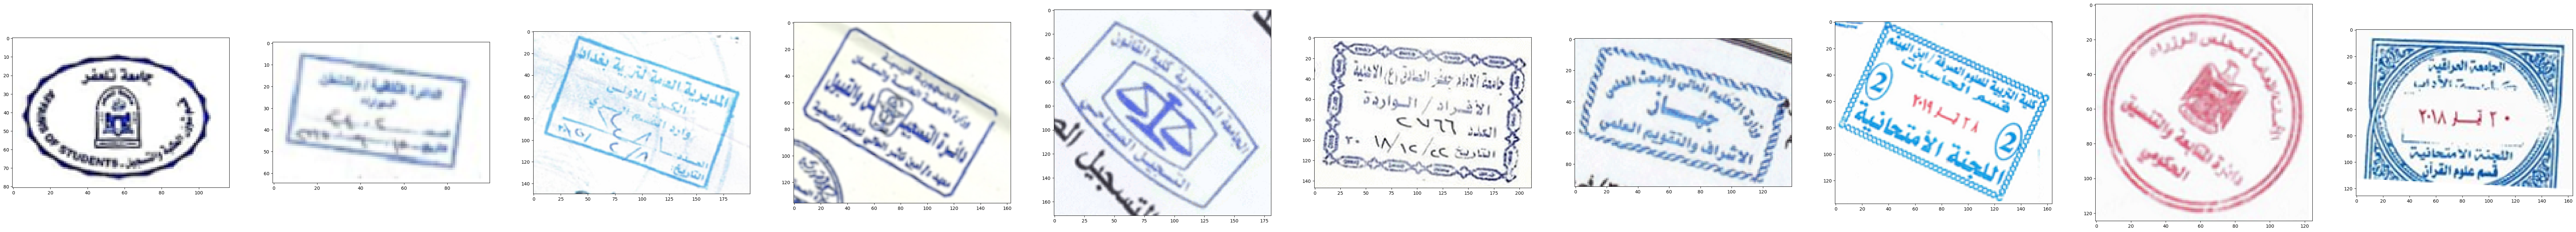

In [ ]:
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(imread(scan_files[i*20]))

In [ ]:
import os

test_image_list = []
train_image_list = scan_files[:]
images_to_remove = []

for file_path in scan_files:
    file_name = os.path.basename(file_path)
    if 'g' in file_name or 'h' in file_name or 'i' in file_name:
        test_image_list.append(file_path)
        images_to_remove.append(file_path)

for image_path in images_to_remove:
    train_image_list.remove(image_path)

print("Test Image List:", test_image_list)
print("Train Image List:", train_image_list)

Test Image List: ['/content/stamps-dataset/101g_30.bmp', '/content/stamps-dataset/101h_35.bmp', '/content/stamps-dataset/101i_40.bmp', '/content/stamps-dataset/103g_30.bmp', '/content/stamps-dataset/103h_35.bmp', '/content/stamps-dataset/103i_40.bmp', '/content/stamps-dataset/104g_30.bmp', '/content/stamps-dataset/104h_35.bmp', '/content/stamps-dataset/104i_40.bmp', '/content/stamps-dataset/105g_30.bmp', '/content/stamps-dataset/105h_35.bmp', '/content/stamps-dataset/105i_40.bmp', '/content/stamps-dataset/106g_30.bmp', '/content/stamps-dataset/106h_35.bmp', '/content/stamps-dataset/106i_40.bmp', '/content/stamps-dataset/107g_30.bmp', '/content/stamps-dataset/107h_35.bmp', '/content/stamps-dataset/107i_40.bmp', '/content/stamps-dataset/111g_30.bmp', '/content/stamps-dataset/111h_35.bmp', '/content/stamps-dataset/111i_40.bmp', '/content/stamps-dataset/112g_30.bmp', '/content/stamps-dataset/112h_35.bmp', '/content/stamps-dataset/112i_40.bmp', '/content/stamps-dataset/113g_30.bmp', '/conte

In [ ]:
from PIL import Image

resized_test_images = []
resized_train_images = []

for image_path in test_image_list:
    image = Image.open(image_path)
    resized_image = image.resize((224, 224))
    resized_test_images.append(resized_image)
    image.close()

for image_path in train_image_list:
    image = Image.open(image_path)
    resized_image = image.resize((224, 224))
    resized_train_images.append(resized_image)
    image.close()
print(resized_test_images)
print(resized_train_images)

[<PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E04364E80>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E04A83670>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E070A7820>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E070A45B0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E070A4370>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E070A7580>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048AD630>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048AD060>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048AE020>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048ADFF0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048ADFC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048ADF90>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048AD3C0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048AD4E0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F5E048AD600>, <PIL.Image.Image image m

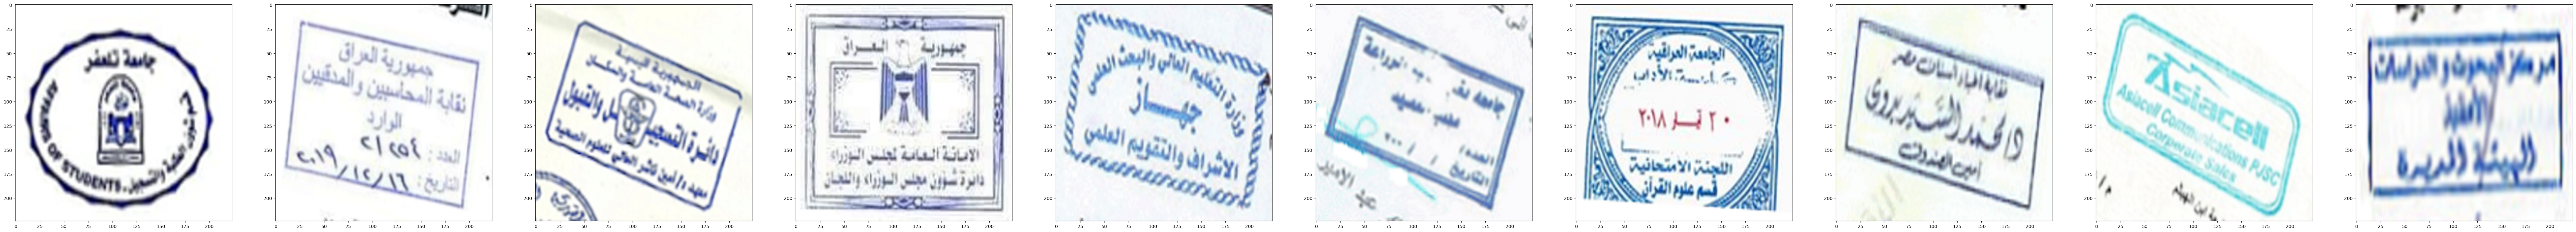

In [ ]:
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(resized_train_images[i*20])

## Data analysis

## Retrainig EfficientNet

In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(include_top=False, weights='imagenet', drop_connect_rate=0.4)

In [ ]:
image_tensors = [tf.convert_to_tensor(image) for image in resized_train_images]
ds_train = tf.data.Dataset.from_tensor_slices(image_tensors)
ds_train = ds_train.shuffle(buffer_size=1000)
ds_train = ds_train.batch(batch_size=32)
ds_train = ds_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
len(ds_train)

16

In [ ]:
image_tensors = [tf.convert_to_tensor(image) for image in resized_test_images]
ds_test = tf.data.Dataset.from_tensor_slices(image_tensors)
ds_test = ds_test.shuffle(buffer_size=1000)
ds_test = ds_test.batch(batch_size=32)
ds_test = ds_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
len(ds_test)

8

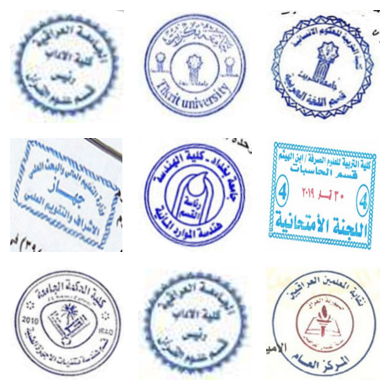

In [ ]:
for images in ds_train.take(1):
    image_arrays = images.numpy()
    fig, axes = plt.subplots(3, 3, figsize=(4, 4))
    axes = axes.flatten()
    for i in range(9):
        axes[i].imshow(image_arrays[i+2])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

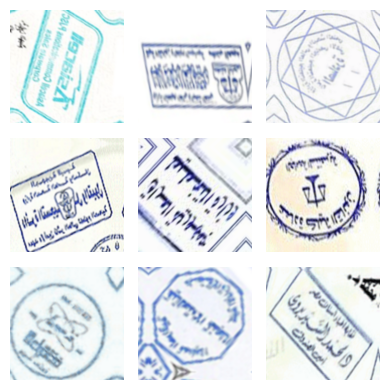

In [ ]:
for images in ds_train.take(1):
    image_arrays = images.numpy()

    augmented_images = []
    for image in image_arrays[2:]:
        augmented_image = img_augmentation(tf.expand_dims(image, 0), training=True)
        augmented_images.append(augmented_image[0])

    augmented_images = tf.stack(augmented_images)

    fig, axes = plt.subplots(3, 3, figsize=(4, 4))
    axes = axes.flatten()

    for i in range(9):
        axes[i].imshow(augmented_images[i].numpy().astype("uint8"))
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

## Evaluation